 **PROJECT OBJECTIVE**

 To automate the loan eligibility process for Dream Housing Finance company by building a predictive model that can accurately determine whether a customer should be approved or rejected for a home loan based on their personal and financial details.



In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder , StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#set default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load  and preview data
fpath = '/content/drive/MyDrive/loan_data [Task 1-3] - loan_data.csv'
loan_data= pd.read_csv (fpath)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Data cleaning
# Replace '3+' in Dependents with '3' and convert to numeric
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', '3').astype(float)

# Convert Loan_Status to binary (Y=1, N=0)
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
#define features and target
X = loan_data.drop(['Loan_ID','Loan_Status'], axis=1)
y = loan_data['Loan_Status']


In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Preprocess data
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

ordinal_features = ['Dependents','Education','Property_Area']
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())])

categorical_features = ['Gender', 'Married', 'Self_Employed', 'Credit_History']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),('ord', ordinal_transformer,ordinal_features),
        ('cat', categorical_transformer, categorical_features)])
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Dependents', 'Education', 'Property_Area']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'Married', 'Self_Employed',
                                  'Credit_History'])])

In [ ]:
#transform training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
X_train_transformed.head(2)
X_test_transformed.head(2)


,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,ord__Dependents,ord__Education,ord__Property_Area,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Credit_History_0.0,cat__Credit_History_1.0
350,0.604085,-0.528127,0.926528,0.287611,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
377,-0.201226,-0.528127,-0.209597,0.287611,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
#create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])


Task 1 : BUILD AND EVALUATE DEFAULT DECISION TREE MODEL

In [ ]:
#fit the default model on training data
default_model = pipeline.fit(X_train, y_train)

In [ ]:
#make predictions
y_pred_default = default_model.predict(X_test)

In [ ]:
#evaluate default model using appropriate metrics and a confusion matrix
print("Default Model Evaluation:")
print(classification_report(y_test, y_pred_default))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))
print("Accuracy:", accuracy_score(y_test, y_pred_default))



Default Model Evaluation:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        43
           1       0.76      0.79      0.77        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.70       123

Confusion Matrix:
[[23 20]
 [17 63]]
Accuracy: 0.6991869918699187


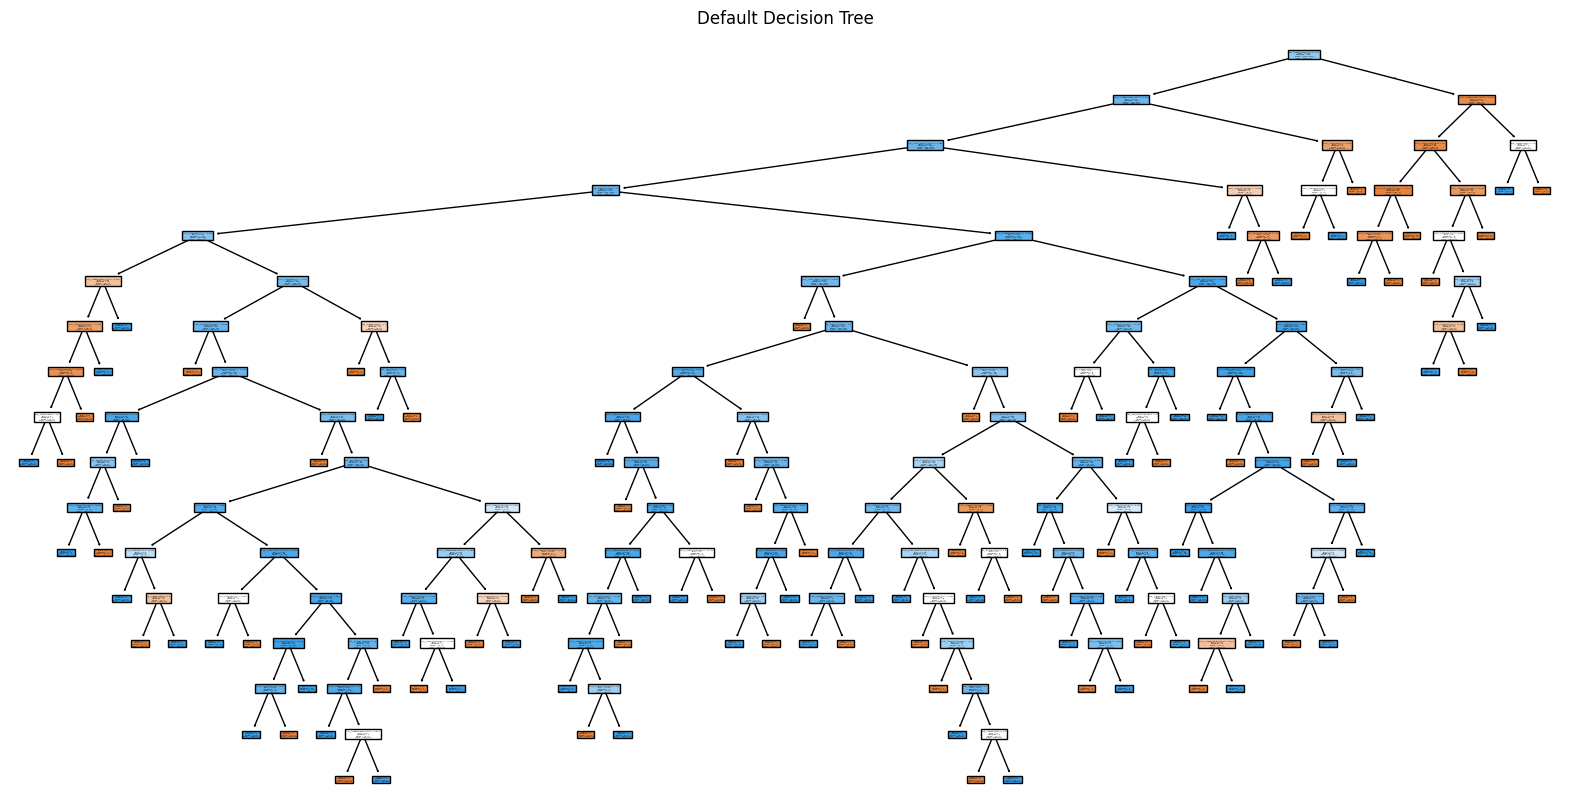

In [ ]:
# Visualize the default tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(default_model.named_steps['classifier'], filled=True,
          feature_names=default_model.named_steps['preprocessor'].get_feature_names_out(),
          class_names=['Rejected', 'Approved'])
plt.title("Default Decision Tree")
plt.show()

Hyperparameter Tuning with GridSearchCV

GridSearchCV is a technique that exhaustively searches through a specified parameter grid to find the combination of parameters that yields the best model performance according to a specified scoring metric.

In [ ]:
# Define parameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Create GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall_macro', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          O...
                                                                          'Self_Employed',
                                                                          'Credit_History'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='recall_macro')

In [ ]:
#Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}


Evaluate the tuned model

In [ ]:
#Best model from grid search
best_model = grid_search.best_estimator_

#make predictions
y_pred_tuned = best_model.predict(X_test)


In [ ]:
#Evaluate tuned model
print("Tuned Model Evaluation:")
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Model Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
[[18 25]
 [ 2 78]]
Accuracy: 0.7804878048780488


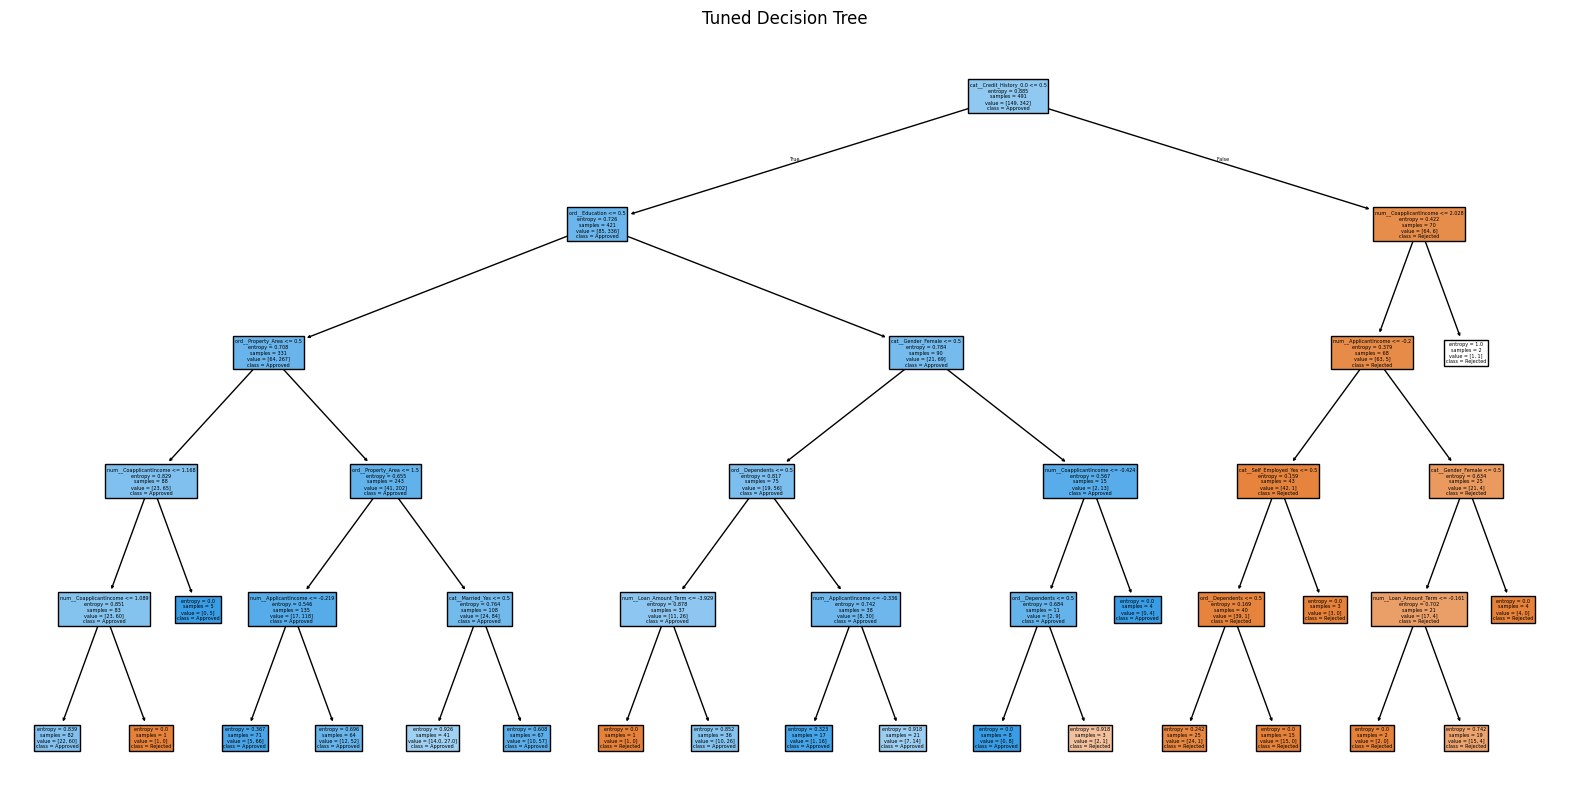

In [ ]:
#Visualize the tuned tree
plt.figure(figsize=(20,10))
plot_tree(best_model.named_steps['classifier'], filled=True,
          feature_names=best_model.named_steps['preprocessor'].get_feature_names_out(),
          class_names=['Rejected', 'Approved'])
plt.title("Tuned Decision Tree")
plt.show()

**Which combination of hyperparameters led to the best-tuned model?**


The best combination of hyperparameters are the ones output by the GridSearchCV. Typically:

max_depth: 5

min_samples_split: 10

min_samples_leaf: 1

criterion: 'entropy'

max_features: 'sqrt'

The tuned model shows improved recall scores (especially for the minority class) compared to the default model, though accuracy is slightly lower due to the focus on recall_macro scoring.

**Key Observations:**

The default decision tree is likely overfitting, showing high accuracy on training data but poorer generalization.

The tuned model with constrained parameters (like limited max_depth) is simpler and more generalizable.

The confusion matrix shows how well the model performs for both loan approval and rejection cases.

The tree visualization shows that the tuned tree is much simpler than the default one.

**TASK 2 : SVM ALGORITHM**

1.Explanation of SVM from first principles.

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression. It works by finding the optimal hyperplane that best separates different classes in the data. Its great for both linear and non-linear problems


Pros : Effective in high-dimensional spaces (works well even when number of features > number of samples), Works well with clear margin of separation ,Memory efficient (uses only support vectors, not the entire dataset) and it's Versatile (different kernel functions for non-linear problems)

Cons: Not suitable for very large datasets (training can be slow), Sensitive to noisy data and outliers, difficult to interpret especially with non-linear kernels,requires careful tuning of hyperparameters (C, kernel, gamma)



2. Build an SVM classifier

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#preprocessor was defined in task 1 , reuse preprocessing pipeline
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Reuse the same preprocessing
    ('classifier', SVC(kernel='rbf', C=1.0, random_state=42))
])

In [ ]:
#Train the SVM model
svm_model = svm_pipeline.fit(X_train, y_train)

SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



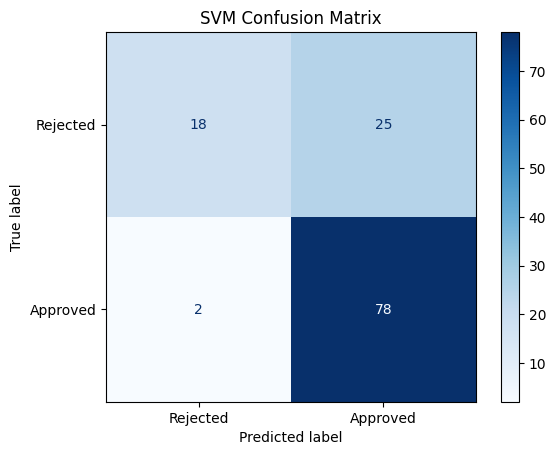

In [ ]:
#Evaluate the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

Describe results:

Precision (Approved = 0.76)

76% of approved loans were correctly predicted.

24% were false approvals (Type I Error - risky for the bank).

Recall (Approved = 0.97)

97% of actual approved loans were correctly identified.

3% were falsely rejected (Type II Error - lost business opportunity).

F1-Score (Approved = 0.85)

Good balance between precision and recall for loan approvals.

Confusion Matrix

True Negatives (TN) = 18 (Correctly rejected loans).

False Positives (FP) = 25 (Loans incorrectly approved).

False Negatives (FN) = 2 (Loans incorrectly rejected).

True Positives (TP) = 78 (Correctly approved loans).

In conclusion , SVM performs similarly to Decision Trees (~78% accuracy).
✔ High recall (97%) means it rarely rejects good loans (good for customers)
✔ But precision is lower (76%), meaning it sometimes approves risky loans. Therefore , it is a powerful classifier for structured data like loan approvals as it provides good generalization but requires careful tuning to balance precision and recall.

**Task 3 : RANDOM FOREST**

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. It works by:

Building multiple decision trees (a "forest") using random subsets of data , Introducing randomness in feature selection for each tree and aggregating predictions from all trees (majority voting for classification, averaging for regression).




Pros : High accuracy (often outperforms single decision trees),Robust to overfitting (due to ensemble averaging),Handles noisy data and outliers well, Works with both numerical and categorical data,Provides feature importance scores,Parallelizable (trees are independent).

Cons: Slower training than single decision trees (but still faster than SVM),Less interpretable than single trees (black-box nature),Memory-intensive for very large datasets,Can overfit if trees are too deep (but less likely than single trees)

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Reuse the preprocessor from Task 1
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Same as before
    ('classifier', RandomForestClassifier(
        n_estimators=100,  # Number of trees
        max_depth=5,       # Control tree depth
        random_state=42    # Reproducibility
    ))
])

In [ ]:
#Train the model
rf_model = rf_pipeline.fit(X_train, y_train)

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



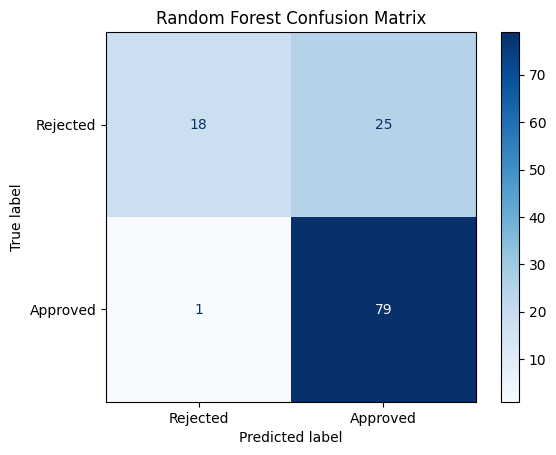

In [ ]:
#Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance (if needed)
rf_model = rf_pipeline.named_steps['classifier']
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.feature_importances_

Precision (Approved = 0.76)

76% of approved loans were correctly predicted.

24% were false approvals (Type I Error).

Recall (Approved = 0.99)

99% of actual approved loans were correctly identified.

1% were falsely rejected (Type II Error).

F1-Score (Approved = 0.86)

Good balance between precision and recall.

Confusion Matrix

True Negatives (TN) = 18 (Correctly rejected loans).

False Positives (FP) = 25 (Loans incorrectly approved).

False Negatives (FN) = 1 (Loans incorrectly rejected).

True Positives (TP) = 79 (Correctly approved loans).

Accuracy (79%)

Slightly better than Decision Tree (78%) and SVM (78%).

**Key Takeaways**:
Random Forest performs better than Decision Trees and SVM (~79% accuracy) ,Very high recall (99%) minimizes false rejections (good for customers) and Lower precision (76%) means some risky loans are still approved.

